In [0]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import os, ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context
newsgroups_train = fetch_20newsgroups(subset='train', remove=['headers', 'footers', 'quotes'])

text_train, y_train = newsgroups_train.data, newsgroups_train.target

newsgroups_test = fetch_20newsgroups(subset='test', remove=['headers', 'footers', 'quotes'])
text_test, y_test = newsgroups_test.data, newsgroups_test.target



banned_words = {'and','of','is','the'}

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = make_pipeline(TfidfVectorizer(min_df = 5, stop_words = banned_words), AdaBoostClassifier())
param_grid = {'adaboostclassifier__n_estimators':[100,150,200], 'tfidfvectorizer__ngram_range':[(1,2)],
              'adaboostclassifier__learning_rate':[0.5,0.75,1]}
grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(text_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=5,
                                                        ngram_range=(1, 1),
                                               

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


NameError: ignored

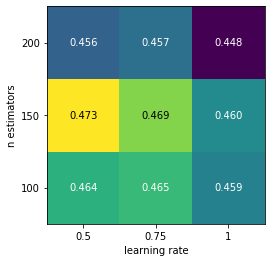

In [0]:
from sklearn.metrics import confusion_matrix
import mglearn
scores = grid.cv_results_['mean_test_score'].reshape(3,3).T
#visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel = 'learning rate', ylabel = 'n estimators', cmap = 'viridis', fmt = '%.3f',
    xticklabels = param_grid['adaboostclassifier__learning_rate'],
    yticklabels = param_grid['adaboostclassifier__n_estimators'])
plt.colorbar(heatmap)

In [0]:
print("CV Best Estimator: {}".format(grid.best_estimator_))
print("CV Results: {}".format(grid.cv_results_))
print('best CV score: {}'.format(grid.best_score_))
print("accuracy: {}".format(grid.score(text_test, y_test)))

CV Best Estimator: Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=5, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words={'and', 'of', 'the', 'is'},
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
   

In [0]:
print("20 News ADABOOST Mean Fit Times:{}".format(grid.cv_results_['mean_fit_time']))

print("20 News ADABOOST accuracy: {}".format(grid.score(text_test, y_test)))

20 News ADABOOST Mean Fit Times:[31.76351228 44.52990789 55.32494974 30.61430616 42.3870801  54.91695423
 30.54108067 42.62618294 55.74918904]
20 News ADABOOST accuracy: 0.4479553903345725


In [0]:
print('20News')
print('20NEWS ADABOOST fittime:{:.4f}'.format(grid.cv_results_['std_fit_time'][8]))

20News
20NEWS ADABOOST fittime:0.6966
